In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from CA_4_support import *

# Steady-State Advection Diffusion Equation

Consider the following ordinary differential equation (ODE) for $x$ in the interval $[-1,1]$:

$$-u''(x) + u'(x) = f(x)$$

With boundary conditions

$$u(-1) = u(1) = 0$$
           
Here, $f(x)$ is a known function and $u(x)$ is the unknown that we are trying to solve for.

### Spectral Element Approximation
The spectral element method (SEM) is a way to solve such an ODE numerically.  In the simplest case, SEM approximates $u(x)$ by a polynomial of degree $N$.

A polynomial can be uniquely described by $P = N+1$ points on the interval $[-1,1]$.  So the SEM introduces a set of $P$ discrete points

$-1 = x_0 < x_1 < x_2 < \dots < x_{N-1} < x_N = 1$

and constructs a linear system

$\mathbf{A}\mathbf{u} = \mathbf{b}$

that is solved to obtain the value of $u$ at each point.

Here, the vector $\mathbf{u} = [u_1,u_2,\dots,u_{N-1}]^T$, where $u_i = u(x_i)$ for $i = 1,2,\dots,N-1$.

We exclude the points $x_0=-1$ and $x_N = 1$ because we already know the value of $u$ because of the boundary conditions.

$\mathbf{b}$ is a vector that depends on the function $f$.

We'll provide a function that takes a polynomial order $N$ as input and creates both the partition points $x_i$ defined in the interval $([-1,1]$, and the system matrix $\mathbf{A}$.  We'll also provide a function that takes the  points $x_i$ and a known function $f(x)$ and returns the vector $\mathbf{b}$. The function signatures are defined below:

```python
A,x =  SEM_system_1(N)

def f(z):
    # define the function f as a function of z
    return f
  
b = SEM_rhs_1(f,x)
```
Generate the arrays $\mathbf{A}$, $\mathbf{b}$, and $\mathbf{x}$ using the provided functions. Use for example `N = 30`

For the function $f$, use $f(x) = 2(x-1)$

Check out the shapes of all 3 objects

In [3]:
print(A.shape)
print(x.shape)
print(b.shape)

(49, 49)
(51,)
(49,)


The array of points $\mathbf{x}$ is of size $N+1$ but the matrix and right hand side lead to a linear system of size $(N-1) \times (N-1)$.  This is because we don't need to solve for the value of $u$ at the two endpoints.

Use $\mathbf{A}$, $\mathbf{b}$, and $\mathbf{x}$ to solve for $\mathbf{u}$.  Check your solution against the exact solution $u_e(x) = x^2 - 1$.  Don't forget to add zeros to the start and end of the vector to account for the boundary conditions.  Do the two solutions match up?

In [1]:
#Obtain u, u_exact and plot 


You can run the cells above changing the number of points. Use larger and smaller values. What do you notice?

The solution will change for different right hand sides.  Experiment with different functions $f(x)$ and see what the solution looks like. For example, try the function:

$$ f(x) = \sin(1.5 \pi x) $$

Note that since your ODE has not changed, your system matrix  $\mathbf{A}$ is still the same! You only need to redefine the vector $\mathbf{b}$.

In [6]:
#Define b


In [2]:
#Obtain u and plot 


# Time-Dependent Advection Diffusion

Now we'll look at the time-dependent advection diffusion equation, which is a partial differential equation (PDE)

$$\frac{\partial u}{\partial t} + \frac{\partial u}{\partial x} - D\frac{\partial^2 u}{\partial x^2} = 0$$

with boundary conditions:

$$u(-1,t) = 0 = \frac{\partial u}{\partial x}(1,t)$$

Where $D = 0.1$ is the diffusion coefficient.  Notice how the boundary condition at the right hand side is a little different than the first equation.

In order to solve this equation we again use the SEM.  However, the equation is time dependent, so we also partition the time dimension:

$$0 = t_0 < t_1 < t_2 < \dots$$.

We assume the $t_i$'s are evenly spaced with distance $\Delta t$.

Now, the solution $u$ depends on both space and time: $u(x,t)$.  For each time $t_n$, we can define a vector of values of $u$ like above:

$\mathbf{u}^{(n)} = [u_1^{(n)},\dots, u_N^{(n)}]^T$.  Here $u_i^{(n)} = u(x_i,t_n)$.  We assume we know $u(x,0)$ so that $\mathbf{u}^{(n)}$ is known.  Then we get a *timestepping scheme*:

\begin{align}
\mathbf{A}\mathbf{u}^{(1)} &= \mathbf{b}^{(0)}\\
\mathbf{A}\mathbf{u}^{(2)} &= \mathbf{b}^{(1)}\\
\mathbf{A}\mathbf{u}^{(3)} &= \mathbf{b}^{(2)}\\
&\ \vdots\\
\mathbf{A}\mathbf{u}^{(n+1)} &= \mathbf{b}^{(n)}
\end{align}

Here $\mathbf{b}^{(n)}$ is a vector that depends on $\mathbf{u}^{(n)}$.

Now, the solution $u$ depends on both space and time: $u(x,t)$.  For each time $t_n$, we can define a vector of values of $u$ like above:

$\mathbf{u}^{(n)} = [u_1^{(n)},\dots, u_N^{(n)}]^T$.  Here $u_i^{(n)} = u(x_i,t_n)$.  We assume we know $u(x,0)$ so that $\mathbf{u}^{(0)}$ is known.  Then we get a *timestepping scheme*:

\begin{align}
\mathbf{A}\mathbf{u}^{(1)} &= \mathbf{b}^{(0)}\\
\mathbf{A}\mathbf{u}^{(2)} &= \mathbf{b}^{(1)}\\
\mathbf{A}\mathbf{u}^{(3)} &= \mathbf{b}^{(2)}\\
&\ \vdots\\
\mathbf{A}\mathbf{u}^{(n+1)} &= \mathbf{b}^{(n)}
\end{align}

Here $\mathbf{b}^{(n)}$ is a vector that depends on $\mathbf{u}^{(n)}$, and can be obtained using the helper function:
```
b = SEM_rhs_2(un)
```
We'll select a value of $\Delta t = 0.01$ and take 200 timesteps.

In [8]:
dt = 0.01        # time increment
timesteps = 200  # number of time steps
N = 50           # polynomial order

The matrix $\mathbf{A}$ depends not just on the polynomial order $N$ but also the value of $\Delta t$. We provide the helper function:

```python
A,x = SEM_system_2(N,dt)
```
Generate the arrays $\mathbf{A}$, and $\mathbf{x}$.

We also provide a function that defines the initial condition $u(x,0)$. 

In [10]:
def u_initial(z):
    a = -10*(z+1)*z**6*(z-1)*(z< 0)
    return a

We will store all the vectors $\mathbf{u}^{(0)}$, $\mathbf{u}^{(1)}$, $\mathbf{u}^{(2)}$,$\dots$ as columns of a matrix. Initialize with zeros the 2d numpy array (matrix) $\mathbf{u}$ with the appropriate shape. Update the first column with the initial condition using the function `u_initial`.

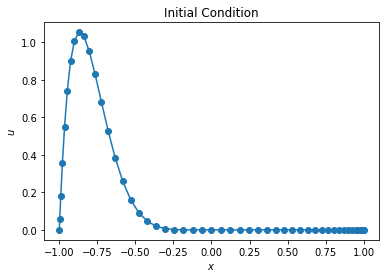

In [12]:
# plot initial condition

...
plt.xlabel('$x$')
plt.ylabel('$u$')
plt.title('Initial Condition')
plt.show()

Generate the array $\mathbf{b}$ corresponding to the initial condition `u[:,0]`

Let's take the first time step and store the solution in `u[:,1]`. Make sure you are handling the size of your arrays correctly and are adding back the boundary condition at $x = 0$

Now you can take the second time step, and store your solution in `u[:,2]`

Let's plot what you have so far:

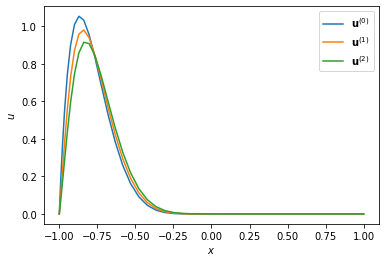

In [16]:
plt.plot(x,u[:,0],label = '$\mathbf{u}^{(0)}$')
plt.plot(x,u[:,1],label ='$\mathbf{u}^{(1)}$' )
plt.plot(x,u[:,2],label = '$\mathbf{u}^{(2)}$')
plt.xlabel('$x$')
plt.ylabel('$u$')
plt.legend()
plt.show()

Only 198 time steps to go...
We'll obviously want to do this in a loop.  But calling `np.linalg.solve` every time step is too expensive.  We'll want to use the LU decomposition of $A$ to make computing the solution less expensive.  Here $\mathbf{A} = \mathbf{PLU}$, where $\mathbf{P}^{-1} = \mathbf{P}^T$ and $\mathbf{L}$ and $\mathbf{U}$ are lower and upper diagonal matrices

The equation

$\mathbf{A}\mathbf{u}^{(n+1)} = \mathbf{b}^{(n)}$

is transformed into 

$\mathbf{PLUu}^{(n+1)} = \mathbf{b}^{(n)}$

so 

$\mathbf{u}^{(n+1)} = \mathbf{U}^{-1}\mathbf{L}^{-1}\mathbf{P}^T\mathbf{b}^{(n)}$

Compute the LU factorization of $\mathbf{A}$ using `scipy.linalg.lu` and invert $\mathbf{L}$ and $\mathbf{U}$ using `scipy.linalg.solve_triangular`

Check out the documentation for `scipy.linalg.solve_triangular` before you use them.  In particular, pay attention to the argument `lower`, and `unit_diagonal`

In [17]:
import scipy.linalg as sla

Use `plt.spy` to plot the non-zero pattern of each matrix

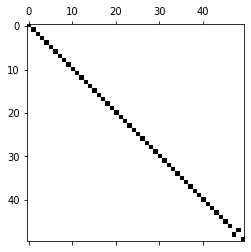

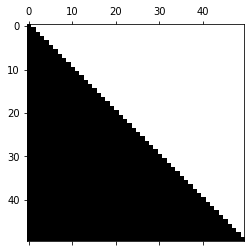

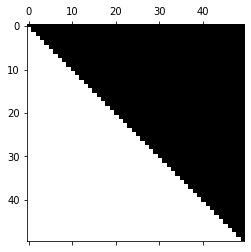

In [19]:
plt.figure()
plt.spy(P)
plt.figure()
plt.spy(L)
plt.figure()
plt.spy(U)

We can plot the time history of the solution using a movie:

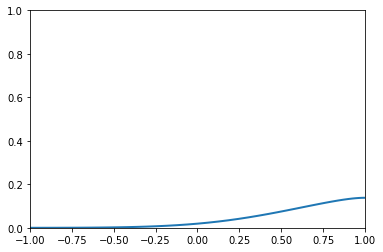

In [20]:
from matplotlib import animation,rc
from IPython.display import HTML

fig,ax = plt.subplots()
ax.set_xlim((-1,1))
ax.set_ylim((0,1.0))
line, = ax.plot([],[],lw=2)

def init():
    line.set_data([],[])
    return (line,)

def animate(i):
    y = u[:,i]
    line.set_data(x,y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=50, blit=True)

rc('animation',html='html5')
anim

# Time-Dependent Diffusion Equation
Now we'll look at the closely related time-dependent diffusion equation

$$\frac{\partial u}{\partial t} - D\frac{\partial^2 u}{\partial x^2} = 0$$

with boundary conditions:

$$u(-1,t) = 0 = u(1,t)$$

We'll get another time-stepping scheme of the same form:
\begin{align}
\mathbf{A}\mathbf{u}^{(1)} &= \mathbf{b}^{(0)}\\
\mathbf{A}\mathbf{u}^{(2)} &= \mathbf{b}^{(1)}\\
\mathbf{A}\mathbf{u}^{(3)} &= \mathbf{b}^{(2)}\\
&\ \vdots\\
\mathbf{A}\mathbf{u}^{(n+1)} &= \mathbf{b}^{(n)}
\end{align}

We will again define the number of time steps, the time increment, the polynomial degree and use a helper function to construct the matrix $\mathbf{A}$:

In [21]:
dt = 0.01
timesteps = 200
N = 50
A,x = SEM_system_3(N,dt)

The diffusion equation leads to a *symmetric positive-definite* matrix.  This means that $\mathbf{A} = \mathbf{A}^T$ and the eigenvalues of $\mathbf{A}$ are positive. (You'll learn about eigenvalues next week).

- Check if the matrix is symmetric:
- Check if the matrix has all positive eigenvalues (you can use np.linalg.eigvals(A))

True
True


Instead of an LU factorization, we'll use the Cholesky factorization: $\mathbf{A} = \mathbf{U}^T\mathbf{U}$, where $\mathbf{U}$ is an upper triangular matrix. This is a more efficient factorization method for symmetric positive-definite matrices) - about half the number of floating operations of LU factorization.

Let's compare the computational time for both methods using large $N$:

In [23]:
N = 200
A,x = SEM_system_3(N,dt)

In [24]:
%timeit sla.cholesky(A)

386 µs ± 19.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [25]:
%timeit sla.lu(A)

716 µs ± 21.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


For the time evolution we'll set `N = 50`, we have the following system matrix $\mathbf{A}$ and initial condition:

In [26]:
N = 50
A,x = SEM_system_3(N,dt)

def u_initial(z):
    a = -10*(z+1)*z**6*(z-1)*(z< 0)
    return a

We will store all the vectors $\mathbf{u}^{(0)}$, $\mathbf{u}^{(1)}$, $\mathbf{u}^{(2)}$,$\dots$ as columns of a matrix. Initialize with zeros the 2d numpy array (matrix) $\mathbf{u}$ with the appropriate shape. Update the first column with the initial condition using the function `u_initial`.

Use `scipy.linalg.cholesky` and `scipy.linalg.solve_triangular` to evolve the solution forward.  Use the helper function 
```python 
b = SEM_rhs_3(un)
```
to create the right hand side as before.

Again, we'll plot the solution using a movie:

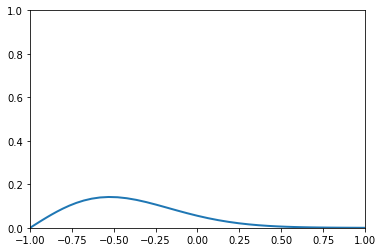

In [29]:
fig,ax = plt.subplots()
ax.set_xlim((-1,1))
ax.set_ylim((0,1.0))
line, = ax.plot([],[],lw=2)

def init():
    line.set_data([],[])
    return (line,)

def animate(i):
    y = u[:,i]
    line.set_data(x,y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=50, blit=True)

rc('animation',html='html5')
anim

# Diffusion Equation Finite Difference equation

The spectral element method is useful, but these simple 1D problems can be solved with the much cheaper finite difference method.

The finite difference method replaces the second derivative with a *centered* difference approximation:

$$\frac{\partial^2 u}{\partial x^2} \approx \frac{u(x-\Delta x) - 2u(x) + u(x+\Delta x)}{\Delta x^2}$$

This leads to the following *tri-diagonal* matrix:

$$\mathbf{A} = \begin{bmatrix} a & b & \ \\
b & a & b \\
\ & b & a & b \\
\ & \ & \ddots & \ddots & \ddots\\
\ & \ & \ &b & a & b\\
\ & \ & \ & \ & b & a\end{bmatrix}$$

where 

$$ a = 1 +  \frac{\Delta t}{5(\Delta x)^2}$$


$$ b = \frac{-\Delta t}{10(\Delta x)^2}$$

(the empty spaces are zeros)

We'll define the number of interior points $N$, as well as $\Delta t$, $\Delta x$, and the number of timesteps.

In [30]:
N = 50
x = np.linspace(-1,1,N+2)  # N+2 because of the two boundary points
dx = x[1] - x[0]

dt = 0.01
timesteps = 200

Build the $N \times N$ finite difference matrix $\mathbf{A}$ specified above as a `numpy` array.  You may find `numpy.diag` useful

Use `plt.spy` to see structure of the matrix

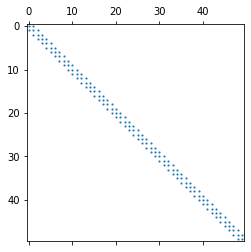

In [32]:
plt.spy(A,markersize = 1)

This is a tri-diagonal matrix, which is a special case of a *banded* linear system.  We'll use `scipy.linalg.solve_banded` which takes advantage of this structure to solve this system.

However, this function does not take the full matrix $\mathbf{A}$, but only it's diagonals stored in a `numpy` array:

$$\mathbf{A} \to \begin{bmatrix} \ & b & b & b & \dots & b & b\\
a & a & a & a & \dots & a & a\\
b & b & b & b & \dots & b & \ \end{bmatrix}$$

Declare a new `numpy` array that stores the entries of $\mathbf{A}$ in this manner.

We will store all the vectors $\mathbf{u}^{(0)}$, $\mathbf{u}^{(1)}$, $\mathbf{u}^{(2)}$,$\dots$ as columns of a matrix. Initialize with zeros the 2d numpy array (matrix) $\mathbf{u}$ with the appropriate shape. Update the first column with the initial condition using the function `u_initial`.

In [34]:
def u_initial(z):
    a = -10*(z+1)*z**6*(z-1)*(z< 0)
    return a




For the finite difference method, it turns out the right hand side is just the previous solution:

$$ \mathbf{A}\mathbf{u}^{(n+1)} = \mathbf{u}^{(n)}$$

Use `scipy.linalg.solve_banded` to evolve the solution forward.

We can plot it again in a movie.  It should look the same as the spectral element solution that was computed previously.

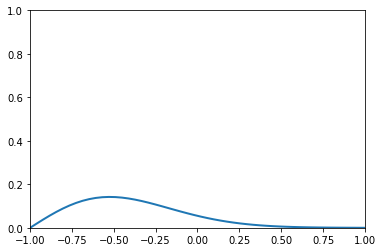

In [36]:
fig,ax = plt.subplots()
ax.set_xlim((-1,1))
ax.set_ylim((0,1.0))
line, = ax.plot([],[],lw=2)

def init():
    line.set_data([],[])
    return (line,)

def animate(i):
    y = u[:,i]
    line.set_data(x,y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=50, blit=True)

rc('animation',html='html5')
anim